# 《基于 heart.csv 数据集的常见降维算法分析》
### 一、降维原因
在机器学习和数据分析中，高维数据会带来计算复杂度增加、数据冗余等问题。降维算法可以有效减少数据维度，保留关键信息，提高模型效率和性能。本报告将使用 heart.csv 数据集，对 LDA 线性判别、PCA 主成分分析和 t - SNE 降维这三种常见降维算法进行分析和比较。


### 二、降维算法原理 
2.1 LDA 线性判别
- 原理 ：LDA（Linear Discriminant Analysis）线性判别分析是一种有监督的降维方法。它的目标是找到一个投影方向，使得不同类别的数据在投影后尽可能分开，同一类别的数据尽可能聚集。通过最大化类间散度与类内散度的比值，来确定最优的投影方向。
- 数学公式 ：设 $S_b$ 为类间散度矩阵，$S_w$ 为类内散度矩阵，LDA 就是求解广义特征值问题 $S_bw = \lambda S_ww$，其中 $w$ 为投影方向，$\lambda$ 为特征值。 2.2.2 PCA 主成分分析
- 原理 ：PCA（Principal Component Analysis）主成分分析是一种无监督的降维方法。它通过对数据进行线性变换，将原始数据投影到一组新的正交坐标轴上，这些坐标轴称为主成分。主成分按照方差大小排序，方差越大表示该主成分包含的信息越多。PCA 选择前 $k$ 个方差最大的主成分作为新的特征，从而实现降维。
- 数学公式 ：首先计算数据的协方差矩阵 $\Sigma$，然后对 $\Sigma$ 进行特征值分解 $\Sigma = U\Lambda U^T$，其中 $U$ 是特征向量矩阵，$\Lambda$ 是特征值对角矩阵。选择前 $k$ 个特征向量组成投影矩阵 $W$，将原始数据 $X$ 投影到新的空间 $Y = XW$。 
2.3 t - SNE 降维
- 原理 ：t - SNE（t - Distributed Stochastic Neighbor Embedding）是一种非线性降维方法，主要用于高维数据的可视化。它通过构建高维数据点和低维数据点之间的概率分布，使得高维空间中相似的数据点在低维空间中也尽可能相似。t - SNE 使用 t 分布来计算低维空间中的相似度，从而解决了传统降维方法在处理局部结构时的不足。
- 数学公式 ：t - SNE 定义了高维空间中数据点之间的相似度 $p_{ij}$ 和低维空间中数据点之间的相似度 $q_{ij}$，通过最小化这两个分布之间的 KL 散度 $C = KL(P||Q) = \sum_{i}\sum_{j}p_{ij}\log\frac{p_{ij}}{q_{ij}}$ 来找到最优的低维表示。
### 三、实验过程 
3.1 数据预处理
- 读取 heart.csv 数据集，将特征数据和目标变量分离。
- 对特征数据进行标准化处理，使得每个特征的均值为 0，方差为 1，以避免特征尺度对降维结果的影响。

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 读取数据
data = pd.read_csv('./csv/heart.csv')
X = data.drop('target', axis=1)  # 特征数据
y = data['target']  # 目标变量

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3.2 降维实验
- LDA 线性判别 ：使用 sklearn 库中的 LinearDiscriminantAnalysis 类进行降维，将数据降维到 1 维（因为目标变量是二分类，LDA 最多可将数据降维到 $C - 1$ 维，$C$ 为类别数）。

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

- PCA 主成分分析 ：使用 sklearn 库中的 PCA 类进行降维，将数据降维到 2 维，以便可视化。

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

- t - SNE 降维 ：使用 sklearn 库中的 TSNE 类进行降维，将数据降维到 2 维，以便可视化。

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

3.3 结果可视化
- 分别绘制 LDA、PCA 和 t - SNE 降维后的数据散点图，不同类别的数据用不同颜色表示，以便直观观察降维效果。

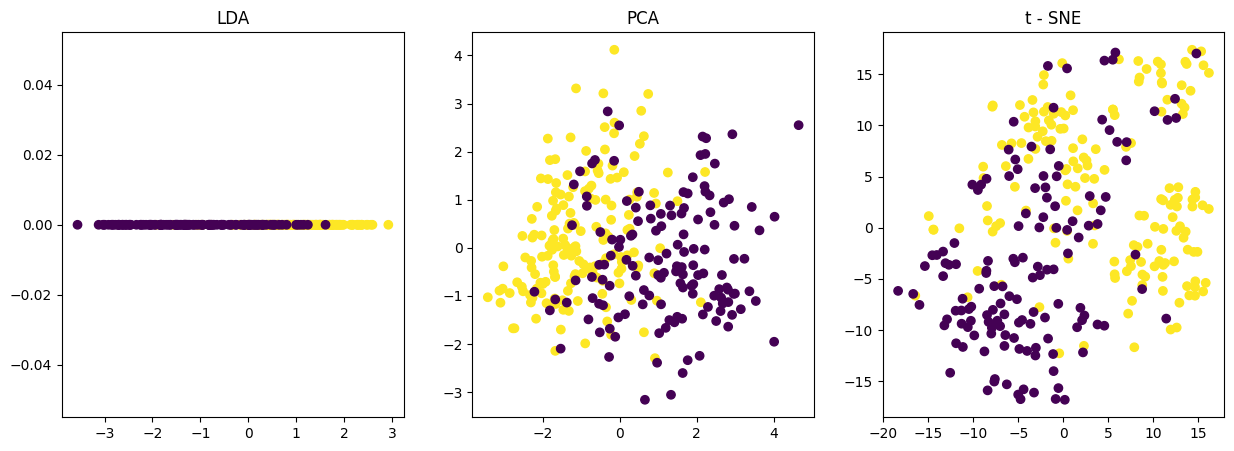

In [7]:
import matplotlib.pyplot as plt

# LDA 可视化
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X_lda, [0] * len(X_lda), c=y, cmap='viridis')
plt.title('LDA')

# PCA 可视化
plt.subplot(132)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')

# t - SNE 可视化
plt.subplot(133)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t - SNE')

plt.show()

### 四、实验结果分析 4.1 可视化结果分析
- 观察 LDA 降维后的散点图，分析不同类别数据在 1 维空间中的分离情况，判断 LDA 是否能够有效区分不同类别的数据。
- 观察 PCA 降维后的散点图，分析数据在 2 维空间中的分布情况，判断 PCA 是否能够保留数据的主要信息。
- 观察 t - SNE 降维后的散点图，分析数据在 2 维空间中的局部结构和聚类情况，判断 t - SNE 是否能够揭示数据的潜在分布。 4.2 降维效果评估
- 可以使用一些评估指标来量化降维效果，如保留的方差比例（PCA）、分类准确率（使用降维后的数据进行分类任务）等。

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 使用 PCA 降维后的数据进行分类
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# 同理可对 LDA 和 t - SNE 降维后的数据进行分类评估

print(f"PCA 降维后分类准确率: {accuracy_pca}")

PCA 降维后分类准确率: 0.8360655737704918


### 五、结论
总结三种降维算法在 heart.csv 数据集上的优缺点和适用场景。例如，LDA 作为有监督的降维方法，在分类任务中可能更能突出类别间的差异；PCA 是无监督的线性降维方法，计算效率高，适合处理大规模数据；t - SNE 作为非线性降维方法，在可视化方面表现较好，但计算复杂度较高。根据实验结果，为不同的数据分析需求推荐合适的降维算法。